<center><img src="http://milestonetechs.com/media/filer_public_thumbnails/filer_public/24/26/24260fc4-2637-4348-b2bd-3c333f2f806d/python_logo.jpg__800x250_q85_crop_subsampling-2.jpg" width="1000"></center>

# Programa de Especialización en Python

## Tema 7. Tratamiento de inconsistencias y data no balanceada

### Prof. Manuel Sigüeñas, M.Sc.(c)

<a id='beginning'></a>


1. [Balanceo de datos](#part1) 
2. [UnderSampling](#part2) 
3. [OverSamplig](#part3) 
4. [Resampling con Smote-Tomek](#part4) 


In [12]:
from IPython.display import Image
%matplotlib inline

____
[Ir a inicio](#beginning)

<a id='part1'></a>
## Balanceo de datos

Información o «dataset» con múltiples clases es entendida como desbalanceada cuando las clases minoritarias están sub-representadas en oposición a la clase.

link: https://imbalanced-learn.readthedocs.io/en/stable/

**Problemática:**
- Los algoritmos de clasificación funcionan pobremente en la clase minoritaria.
- El costo de mala clasificación en dicha clase suele ser mucho mayor que el resto.
- En muchos dominios del mundo real existe una clase dentro de la variable de estudio o target la cual acumula la gran mayoría de elementos.

**Estrategias de balanceo:**

Existen en la literatura muchas maneras o metodologías para balancear o equilibrar las clases, cada una dependiendo de la proporción de elementos en cada una de las clases y del tipo de problema que uno está abordando. Entre las más usadas y estudiadas tenemos:

- UnderSampling
- OverSamplig
- SMOTE
- Resampling

#### Datos: señal entel

El objetivo es construir un modelo para predecir si en cierta zona habrá o no habrá reclamo de clientes (indicentes). Para ello cada registro contiene información de:

**RSRP:** Nivel de Señal medido en dBm. Generalmente una buena señal es de -70 dBm, y luego se va degradando hacia valores muy malos por debajo de -115 dBm. Mientras más negativo es el valor peor es la señal. Con respecto a este valor, es importante señalar que los **valores perdidos** fueron codificados como **0**.

**Redireccion:** Si una red 4G hay redirecciones o transiciones hacia 3G es un indicativo de que hay problemas en la señal. Esta variable indica la cantidad de conexiones que se van a 3G.

**CQI:** Indicador de la calidad del enlace de radiofrecuencia. Los valores van de 1 a 15. 6 o 7 son valores malos, a partir de 12 hay una buena calidad. A menor calidad hay propensión de mayor reclamos.

**Incidentes:** Variable objetivo, que indica la cantidad de reclamos que existen en la zona. Podemos recodificar 1: Reclamo, 0: No Reclamo. Hay valores 0, nulos, vacíos que habría que limpiar. Adicionalmente hay pocos indicentes (Reclamos) con relación a la cantidad de registros, por lo que habría que como tarea previa (preprocesamiento) realizar un **balanceo de datos**.

In [1]:
#pip install tensorflow

In [2]:
# imbalanced-learn requiere los siguientes paquetes:
import numpy as np
import scipy
import sklearn
import tensorflow #(opcional)
import keras #requiere instalar tensorflow (opcional)

Using TensorFlow backend.


In [3]:
#!pip install imbalanced-learn

In [4]:
#pip install --user git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from pylab import rcParams


In [7]:
#Después de la instalación exitosa, la extensión watermark se puede cargar a través de:
%reload_ext watermark
%watermark -a "Social Data Consulting" -u -d -p numpy,scipy,matplotlib,sklearn

Social Data Consulting 
last updated: 2019-10-20 

numpy 1.16.2
scipy 1.2.1
matplotlib 3.0.3
sklearn 0.0


In [12]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

In [13]:
os.getcwd() #esto te permite conocer el directorio actual

'/home/ronald/Sistemas/app-python-ml/app/sesión_4'

In [14]:
os.chdir(os.getcwd()) # la ruta absoluta
#una vez ubicado en el directorio adecuado puedes ejecutar el comando 

In [20]:
FileCSV="/home/ronald/Sistemas/app-python-ml/app/sesión_4/datos/Grid v1.csv"
entel=pd.read_csv(FileCSV)
entel.head(n=5)

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
0,A1,A,1,0.0,0,0.0,NaN,0.0
1,A2,A,2,0.0,0,0.0,NaN,0.0
2,A3,A,3,0.0,0,0.0,NaN,0.0
3,A4,A,4,0.0,0,0.0,NaN,0.0
4,A5,A,5,0.0,0,0.0,NaN,0.0


In [21]:
print(entel.shape)

(197640, 8)


In [22]:
entel = entel.loc[(entel['rsrp'] < 0)]
print(entel.shape)

(23103, 8)


In [23]:
print(pd.value_counts(entel['incidentes'], sort = True))

0    21601
1     1279
2      167
3       41
4       11
6        2
7        1
5        1
Name: incidentes, dtype: int64


In [24]:
entel.dtypes

Description     object
Col_Name        object
Row_Name         int64
rsrp           float64
incidentes       int64
redireccion    float64
best_server     object
cqi            float64
dtype: object

In [25]:
#código para cambiar formato de datos
#entel['incidentes'] = entel['incidentes'].astype(np.float64) 

In [26]:
entel['incidentes']=entel["incidentes"].replace([2, 3, 4, 5, 6, 7],1)

In [27]:
print(pd.value_counts(entel['incidentes'], sort = True))

0    21601
1     1502
Name: incidentes, dtype: int64


In [28]:
entel = entel[["rsrp", "redireccion", "cqi", "incidentes"]]

In [29]:
entel.head()

,rsrp,redireccion,cqi,incidentes
14400,-115.7500,884.696988,10.856694,0
14949,-112.7500,381.359613,11.205094,0
15498,-118.3750,713.387431,8.729160,0
16046,-115.3750,307.311721,9.607077,0
16596,-118.1875,1728.576707,9.835512,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X, y = entel.iloc[:, 0:3].values, entel.iloc[:, 3].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [32]:
#Datos de entrenamiento
x_t= pd.DataFrame(X_train, columns=["rsrp", "redireccion", "cqi"])
y_t= pd.DataFrame(y_train, columns=["incidentes"])

entel_entrenamiento = pd.concat([x_t, y_t], axis=1)
entel_entrenamiento.head()

,rsrp,redireccion,cqi,incidentes
0,-118.7500,11229.222100,7.420288,0
1,-109.3750,4810.049775,8.735570,0
2,-118.5625,14817.830880,7.855299,0
3,-111.4375,374.690909,8.024744,0
4,-105.0625,771.971040,11.067591,0


Text(0, 0.5, 'número de observaciones')

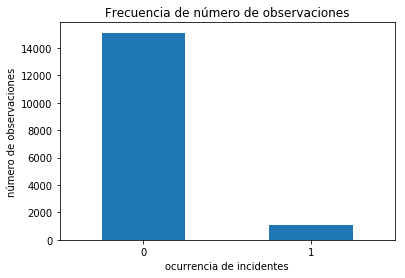

In [104]:
count_classes = pd.value_counts(entel_entrenamiento['incidentes'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("ocurrencia de incidentes")
plt.ylabel("número de observaciones")

____
[Ir a inicio](#beginning)

<a id='part2'></a>
## UnderSampling

Registros de la clase mayoritaria en el conjunto de entrenamiento se eliminan al azar hasta que la relación o proporción entre la clase minoritaria y mayoritaria se encuentre en el nivel deseado.

**Desventaja:** podrían eliminarse ejemplos potencialmente importantes para el proceso de modelado o aprendizaje .

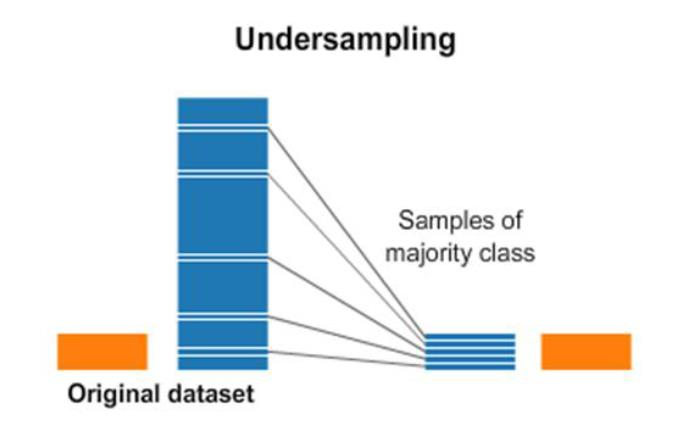

In [53]:
Image(filename='D:/Python/1. Nivel I/7/imagenes/07_01.png', width=400) 

In [110]:
unds = NearMiss(ratio=0.5, n_neighbors=3, version=2, random_state=1)

In [111]:
X_t_unds, y_t_unds = unds.fit_sample(X_train, y_train)
#Datos de entrenamiento
x_t_unds= pd.DataFrame(X_t_unds, columns=["rsrp", "redireccion", "cqi"])
y_t_unds= pd.DataFrame(y_t_unds, columns=["incidentes"])

entel_entrenamiento_unds = pd.concat([x_t_unds, y_t_unds], axis=1)
entel_entrenamiento_unds.head()

,rsrp,redireccion,cqi,incidentes
0,-115.1875,92275.58028,9.051622,0
1,-118.3750,92628.23732,7.894116,0
2,-113.6875,91926.44499,9.141871,0
3,-119.1250,91877.50918,7.808917,0
4,-116.6875,91559.27466,5.915445,0


Text(0, 0.5, 'número de observaciones')

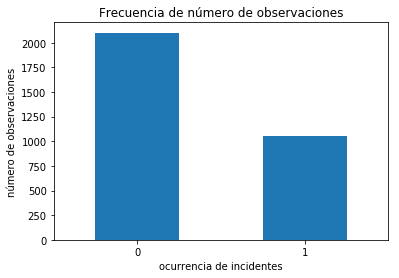

In [112]:
count_classes = pd.value_counts(entel_entrenamiento_unds['incidentes'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("ocurrencia de incidentes")
plt.ylabel("número de observaciones")

In [52]:
print(pd.value_counts(entel_entrenamiento_unds['incidentes'], sort = True))

0    2102
1    1051
Name: incidentes, dtype: int64


In [51]:
print(entel_entrenamiento_unds.shape)

(3153, 4)


____
[Ir a inicio](#beginning)

<a id='part3'></a>
## OverSampling

Registros de la clase minoritaria en el conjunto de entrenamiento se replican o clonan al azar hasta que la relación o proporción entre la clase minoritaria y mayoritaria se encuentre en el nivel deseado.

**desventaja:** podría generarse sobre-estimación o sub-estimación dependiendo de la aleatoriedad y es muy costoso computacionalmente.

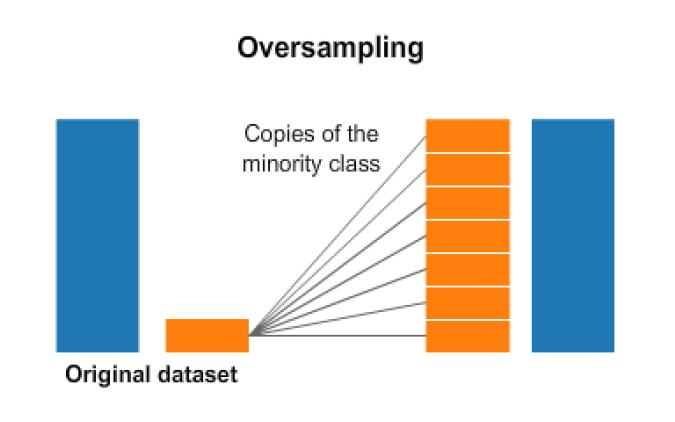

In [54]:
Image(filename='D:/Python/1. Nivel I/7/imagenes/07_02.png', width=400) 

In [113]:
os =  RandomOverSampler(ratio=0.5)

In [114]:
X_t_overs, y_t_overs = os.fit_sample(X_train, y_train)
#Datos de entrenamiento
x_t_overs= pd.DataFrame(X_t_overs, columns=["rsrp", "redireccion", "cqi"])
y_t_overs= pd.DataFrame(y_t_overs, columns=["incidentes"])

entel_entrenamiento_overs = pd.concat([x_t_overs, y_t_overs], axis=1)
entel_entrenamiento_overs.head()

,rsrp,redireccion,cqi,incidentes
0,-118.7500,11229.222100,7.420288,0
1,-109.3750,4810.049775,8.735570,0
2,-118.5625,14817.830880,7.855299,0
3,-111.4375,374.690909,8.024744,0
4,-105.0625,771.971040,11.067591,0


Text(0, 0.5, 'número de observaciones')

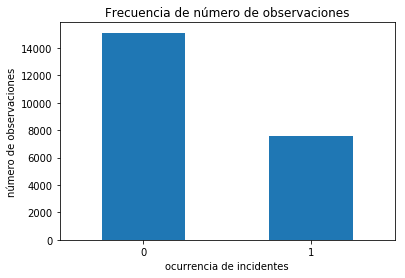

In [115]:
count_classes = pd.value_counts(entel_entrenamiento_overs['incidentes'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("ocurrencia de incidentes")
plt.ylabel("número de observaciones")

In [59]:
print(pd.value_counts(entel_entrenamiento_overs['incidentes'], sort = True))

0    15121
1     7560
Name: incidentes, dtype: int64


In [60]:
print(entel_entrenamiento_overs.shape)

(22681, 4)


____
[Ir a inicio](#beginning)

<a id='part4'></a>
## Resampling con Smote-Tomek

técnica muy usada que consiste en aplicar en simultáneo un algoritmo de **UnderSampling** y otro de **OverSampling** a la vez al dataset. Se utilizará **SMOTE** **(Syntetic Minority Oversamplig
Technique)** para oversampling: busca puntos vecinos cercanos y agrega puntos «en linea recta» entre ellos. Y usaremos **Tomek** para undersampling que quita los de distinta clase que sean vecinos más cercanos y deja ver mejor la decisión boundary (la zona limítrofe de nuestras clases).

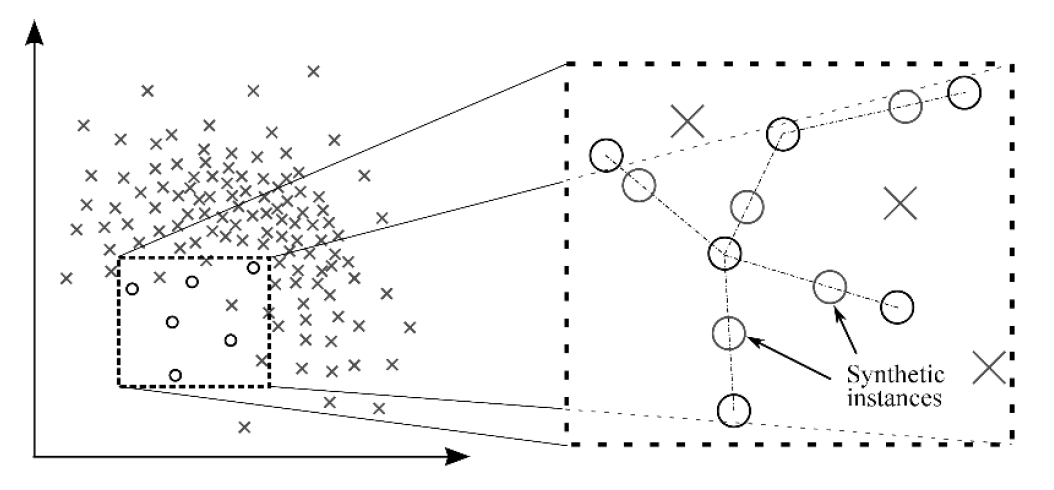

In [62]:
Image(filename='D:/Python/1. Nivel I/7/imagenes/07_03.png', width=600) 

In [122]:
os_us = SMOTETomek(ratio=0.5)

In [123]:
X_t_st, y_t_st = os_us.fit_sample(X_train, y_train)
#Datos de entrenamiento
x_t_st= pd.DataFrame(X_t_overs, columns=["rsrp", "redireccion", "cqi"])
y_t_st= pd.DataFrame(y_t_overs, columns=["incidentes"])

entel_entrenamiento_smotetomek = pd.concat([x_t_st, y_t_st], axis=1)
entel_entrenamiento_smotetomek.head()

,rsrp,redireccion,cqi,incidentes
0,-118.7500,11229.222100,7.420288,0
1,-109.3750,4810.049775,8.735570,0
2,-118.5625,14817.830880,7.855299,0
3,-111.4375,374.690909,8.024744,0
4,-105.0625,771.971040,11.067591,0


Text(0, 0.5, 'número de observaciones')

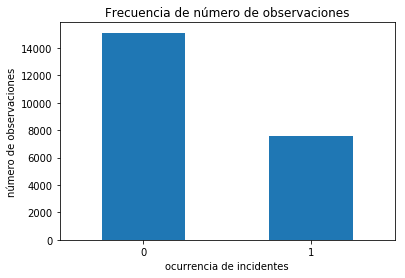

In [124]:
count_classes = pd.value_counts(entel_entrenamiento_smotetomek['incidentes'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("ocurrencia de incidentes")
plt.ylabel("número de observaciones")

In [125]:
print(pd.value_counts(entel_entrenamiento_smotetomek['incidentes'], sort = True))

0    15121
1     7560
Name: incidentes, dtype: int64


In [126]:
print(entel_entrenamiento_smotetomek.shape)

(22681, 4)


____
[Ir a inicio](#beginning)